In [1]:
%matplotlib inline
import gdal
from osgeo import osr
import sys
import netCDF4
import numpy as np
import xarray as xr
import os
from itertools import groupby
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

In [9]:
prefix= "/Volumes/TOSHIBA EXT/nexgddp/data"

def get_file(var, scenario, model, year, **kwargs):
    filename = var + "_day_BCSD_" + scenario + "_r1i1p1_" + model + "_" + year + ".nc"
    filename = kwargs.get("prefix") + "/" + filename if kwargs.get('prefix') else filename
    print(filename)
    dataset = xr.open_dataset(filename)
    return dataset


/Volumes/TOSHIBA EXT/nexgddp/data/tasmax_day_BCSD_historical_r1i1p1_ACCESS1-0_1950.nc


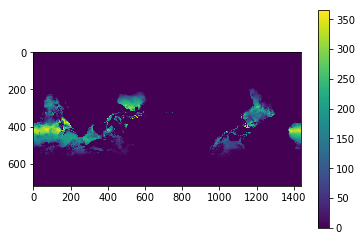

In [10]:
def tmax90F(scenario, model, year, **kwargs):
    dataset = get_file("tasmax", scenario, model, year, prefix = kwargs.get('prefix'))
    data_array = dataset.to_array()
    result = np.apply_along_axis(lambda x: (x > 305.372).sum(), 1, data_array)
    return result

plt.imshow(np.squeeze(tmax90F("historical", "ACCESS1-0", "1950", prefix=prefix)))
plt.colorbar()

data/tasmax_day_BCSD_historical_r1i1p1_ACCESS1-0_1950.nc


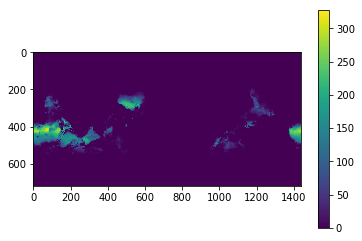

In [5]:
def tmax95F(scenario, model, year, **kwargs):
    dataset = get_file("tasmax", scenario, model, year, prefix = kwargs.get('prefix'))
    data_array = dataset.to_array()
    result = np.apply_along_axis(lambda x: (x > 308.150).sum(), 1, data_array)
    return result

plt.imshow(np.squeeze(tmax95F("historical", "ACCESS1-0", "1950", prefix=prefix)))
plt.colorbar()

data/tasmax_day_BCSD_historical_r1i1p1_ACCESS1-0_1950.nc


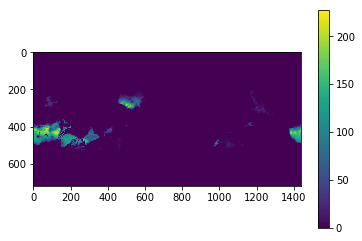

In [6]:
def tmax100F(scenario, model, year, **kwargs):
    dataset = get_file("tasmax", scenario, model, year, prefix = kwargs.get('prefix'))
    data_array = dataset.to_array()
    result = np.apply_along_axis(lambda x: (x > 310.928).sum(), 1, data_array)
    return result

plt.imshow(np.squeeze(tmax100F("historical", "ACCESS1-0", "1950", prefix=prefix)))
plt.colorbar()

data/tasmax_day_BCSD_historical_r1i1p1_ACCESS1-0_1950.nc


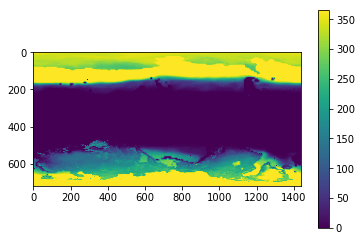

In [7]:
def icing_days(scenario, model, year, **kwargs):
    dataset = get_file("tasmax", scenario, model, year, prefix = kwargs.get('prefix'))
    data_array = dataset.to_array()
    result = np.apply_along_axis(lambda x: (x < 273.150).sum(), 1, data_array)
    return result

plt.imshow(np.squeeze(icing_days("historical", "ACCESS1-0", "1950", prefix=prefix)))
plt.colorbar()

data/tasmin_day_BCSD_historical_r1i1p1_ACCESS1-0_1950.nc


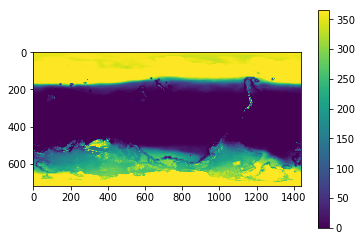

In [8]:
def frost_days(scenario, model, year, **kwargs):
    dataset = get_file("tasmin", scenario, model, year, prefix = kwargs.get('prefix'))
    data_array = dataset.to_array()
    result = np.apply_along_axis(lambda x: (x < 273.150).sum(), 1, data_array)
    return result

plt.imshow(np.squeeze(frost_days("historical", "ACCESS1-0", "1950", prefix=prefix)))
plt.colorbar()

data/tasmin_day_BCSD_historical_r1i1p1_ACCESS1-0_1950.nc


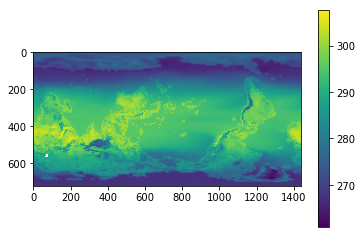

In [9]:
def percentile99(var, scenario, model, year, **kwargs):
    dataset = get_file(var, scenario, model, year, prefix = kwargs.get('prefix'))
    data_array = dataset.to_array()
    result = np.apply_along_axis(lambda x: np.percentile(x, 99), 1, data_array)
    return result

plt.imshow(np.squeeze(percentile99("tasmin", "historical", "ACCESS1-0", "1950", prefix=prefix)))
plt.colorbar()

data/tasmin_day_BCSD_historical_r1i1p1_ACCESS1-0_1950.nc


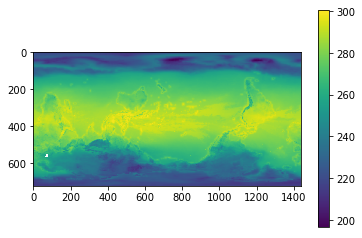

In [10]:
def percentile1(var, scenario, model, year, **kwargs):
    dataset = get_file(var, scenario, model, year, prefix = kwargs.get('prefix'))
    data_array = dataset.to_array()
    result = np.apply_along_axis(lambda x: np.percentile(x, 1), 1, data_array)
    return result

plt.imshow(np.squeeze(percentile1("tasmin", "historical", "ACCESS1-0", "1950", prefix=prefix)))
plt.colorbar()

data/pr_day_BCSD_historical_r1i1p1_ACCESS1-0_1950.nc


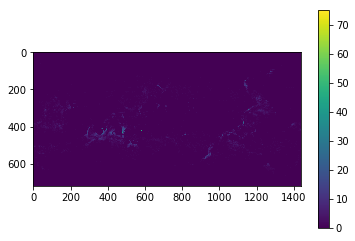

In [11]:
def pr2in(scenario, model, year, **kwargs):
    dataset = get_file("pr", scenario, model, year, prefix = kwargs.get('prefix'))
    data_array = dataset.to_array()
    result = np.apply_along_axis(lambda x: (x > 0.0005879).sum(), 1, data_array)
    return result

plt.imshow(np.squeeze(pr2in("historical", "ACCESS1-0", "1950", prefix=prefix)))
plt.colorbar()

data/pr_day_BCSD_historical_r1i1p1_ACCESS1-0_1950.nc


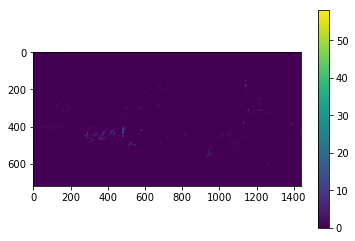

In [12]:
def pr3in(scenario, model, year, **kwargs):
    dataset = get_file("pr", scenario, model, year, prefix = kwargs.get('prefix'))
    data_array = dataset.to_array()
    result = np.apply_along_axis(lambda x: (x > 0.0008819).sum(), 1, data_array)
    return result

plt.imshow(np.squeeze(pr3in("historical", "ACCESS1-0", "1950", prefix=prefix)))
plt.colorbar()

data/pr_day_BCSD_historical_r1i1p1_ACCESS1-0_1950.nc


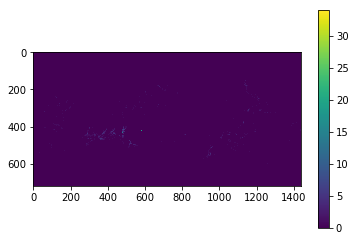

In [13]:
def pr4in(scenario, model, year, **kwargs):
    dataset = get_file("pr", scenario, model, year, prefix = kwargs.get('prefix'))
    data_array = dataset.to_array()
    result = np.apply_along_axis(lambda x: (x > 0.0011759).sum(), 1, data_array)
    return result

plt.imshow(np.squeeze(pr4in("historical", "ACCESS1-0", "1950", prefix=prefix)))
plt.colorbar()

data/pr_day_BCSD_historical_r1i1p1_ACCESS1-0_1950.nc


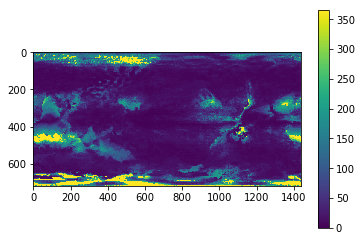

In [14]:
def consecDD(scenario, model, year, **kwargs):
    dataset = get_file("pr", scenario, model, year, prefix = kwargs.get('prefix'))
    data_array = dataset.to_array()
    def calc(data_values):
        cdd_count = 0
        max_count = 0
        for value in data_values:
            if value < 0.0000029398:
                cdd_count = cdd_count + 1
                if cdd_count > max_count:
                    max_count = cdd_count
            else:
                cdd_count = 0
        return max_count
    result = np.apply_along_axis(calc, 1, data_array)
    return result

plt.imshow(np.squeeze(consecDD("historical", "ACCESS1-0", "1950", prefix=prefix)))
plt.colorbar()

data/pr_day_BCSD_historical_r1i1p1_ACCESS1-0_1950.nc


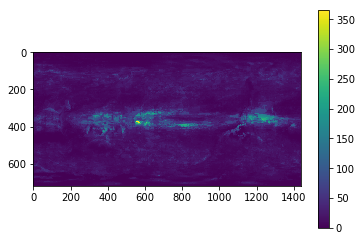

In [15]:
def consecWD(scenario, model, year, **kwargs):
    dataset = get_file("pr", scenario, model, year, prefix = kwargs.get('prefix'))
    data_array = dataset.to_array()
    def calc(data_values):
        cwd_count = 0
        max_count = 0
        for value in data_values:
            if value >= 0.0000029398:
                cwd_count = cwd_count + 1
                if cwd_count > max_count:
                    max_count = cwd_count
            else:
                cwd_count = 0
        return max_count
    result = np.apply_along_axis(calc, 1, data_array)
    return result

plt.imshow(np.squeeze(consecWD("historical", "ACCESS1-0", "1950", prefix=prefix)))
plt.colorbar()

data/tasmax_day_BCSD_historical_r1i1p1_ACCESS1-0_1950.nc


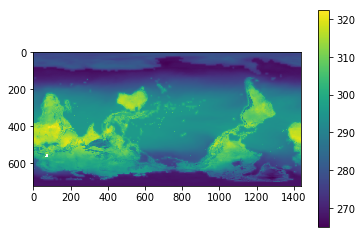

In [16]:
def tmax5day(scenario, model, year, **kwargs):
    dataset = get_file("tasmax", scenario, model, year, prefix = kwargs.get('prefix'))
    data_array = dataset.to_array()
    def moving_average(a, n=5):
        ret = np.cumsum(a, dtype=float)
        ret[n:] = ret[n:] - ret[:-n]
        return ret[n - 1:] / n
    moving_averages = np.apply_along_axis(moving_average, 1, data_array)
    max_temps =       np.apply_along_axis(np.amax, 1, moving_averages)
    return max_temps
    
plt.imshow(np.squeeze(tmax5day("historical", "ACCESS1-0", "1950", prefix=prefix)))
plt.colorbar()

data/tasmin_day_BCSD_historical_r1i1p1_ACCESS1-0_1950.nc


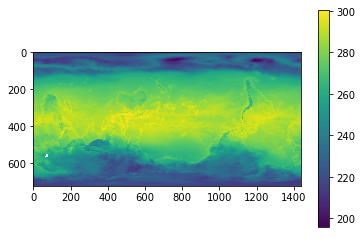

In [4]:
def tmin5day(scenario, model, year, **kwargs):
    dataset = get_file("tasmin", scenario, model, year, prefix = kwargs.get('prefix'))
    data_array = dataset.to_array()
    def moving_average(a, n=5):
        ret = np.cumsum(a, dtype=float)
        ret[n:] = ret[n:] - ret[:-n]
        return ret[n - 1:] / n
    moving_averages = np.apply_along_axis(moving_average, 1, data_array)
    min_temps =       np.apply_along_axis(np.amin, 1, moving_averages)
    return min_temps
    
plt.imshow(np.squeeze(tmin5day("historical", "ACCESS1-0", "1950", prefix=prefix)))
plt.colorbar()

In [11]:
%matplotlib inline
import gdal
from osgeo import osr
import sys
import netCDF4
import numpy as np
import xarray as xr
import os
from itertools import groupby
import matplotlib.pyplot as plt
import gdal

prefix= "/Volumes/TOSHIBA EXT/nexgddp/data"


def get_file(var, scenario, model, year, **kwargs):
    filename = var + "_day_BCSD_" + scenario + "_r1i1p1_" + model + "_" + year + ".nc"
    filename = kwargs.get("prefix") + "/" + filename if kwargs.get('prefix') else filename
    print(filename)
    dataset = xr.open_dataset(filename)
    return dataset

def calc_cdd(data_values):
    cdd_count = 0
    max_count = 0
    for value in data_values:
        if value < 0.0000029398:
            cdd_count = cdd_count + 1
            if cdd_count > max_count:
                max_count = cdd_count
        else:
            cdd_count = 0
    return max_count

def calc_cwd(data_values):
    cwd_count = 0
    max_count = 0
    for value in data_values:
        if value >= 0.0000029398:
            cwd_count = cwd_count + 1
            if cwd_count > max_count:
                max_count = cwd_count
        else:
            cwd_count = 0
    return max_count

def moving_average(a, n=5):
    ret = np.cumsum(a, dtype=float)
    ret[n:] = ret[n:] - ret[:-n]
    return ret[n - 1:] / n

def cut_and_paste(raster):
    cut = np.split(np.squeeze(raster), 2, axis = 1)
    paste = np.concatenate((cut[1], cut[0]), axis = 1)
    return paste

def calc(scenario, model, year, **kwargs):
    print("Getting files for year " + year)
    dataset_tasmin = get_file("tasmin", scenario, model, year, prefix=kwargs.get('prefix'))
    dataset_tasmax = get_file("tasmax", scenario, model, year, prefix=kwargs.get('prefix'))
    dataset_pr     = get_file("pr", scenario, model, year, prefix=kwargs.get('prefix'))
    
    print("Extracting data")
    array_tasmin = dataset_tasmin.to_array()
    array_tasmax = dataset_tasmax.to_array()
    array_pr     = dataset_pr.to_array()
    
    print("Index calc")
    
    print("tmax90F")
    tmax90F = np.apply_along_axis(lambda x: (x > 305.372).sum(), 1, array_tasmax)
    
    print("tmax95F")
    tmax95F = np.apply_along_axis(lambda x: (x > 308.150).sum(), 1, array_tasmax)
    
    print("tmax100F")
    tmax100F = np.apply_along_axis(lambda x: (x > 310.928).sum(), 1, array_tasmax)

    print("icing_days")
    icing_days = np.apply_along_axis(lambda x: (x < 273.150).sum(), 1, array_tasmax)
    
    print("frost_days")
    frost_days = np.apply_along_axis(lambda x: (x < 273.150).sum(), 1, array_tasmin)
    
    print("pr2in")
    pr2in = np.apply_along_axis(lambda x: (x > 0.0005879).sum(), 1, array_pr)
    
    print("pr3in")
    pr3in = np.apply_along_axis(lambda x: (x > 0.0008819).sum(), 1, array_pr)
    
    print("pr4in")
    pr4in = np.apply_along_axis(lambda x: (x > 0.0011759).sum(), 1, array_pr)
    
    print("cdd")
    cdd = np.apply_along_axis(lambda x: calc_cdd(x), 1, array_pr)
    
    print("cwd")
    cwd = np.apply_along_axis(lambda x: calc_cwd(x), 1, array_pr)
    
    print("tmax5day")
    tasmax_moving_averages = np.apply_along_axis(moving_average, 1, array_tasmax)
    tmax5day = np.apply_along_axis(np.amax, 1, tasmax_moving_averages)
    
    print("tmin5day")
    tasmin_moving_averages = np.apply_along_axis(moving_average, 1, array_tasmin)
    tmin5day = np.apply_along_axis(np.amax, 1, tasmin_moving_averages)
    
    print("tmax99p")
    tmax99p = np.apply_along_axis(lambda x: np.percentile(x, 99), 1, array_tasmax)
    
    print("tmax1p")
    tmax1p = np.apply_along_axis(lambda x: np.percentile(x, 1), 1, array_tasmax)
    
    print("tmin99p")
    tmin99p = np.apply_along_axis(lambda x: np.percentile(x, 99), 1, array_tasmin)
    
    print("tmin1p")
    tmin1p = np.apply_along_axis(lambda x: np.percentile(x, 1), 1, array_tasmin)
    
    print("pr99p")
    pr99p = np.apply_along_axis(lambda x: np.percentile(x, 99), 1, array_pr)
    
    print("pr1p")
    pr1p = np.apply_along_axis(lambda x: np.percentile(x, 1), 1, array_pr)
    
    print("prmaxday")
    prmaxday = np.apply_along_axis(lambda x: np.amax(x) * 86400, 1, array_pr)
    
    processed_arrays = np.stack((
        tmax90F,
        tmax95F,
        tmax100F,
        icing_days,
        frost_days,
        pr2in,
        pr3in,
        pr4in,
        cdd,
        cwd,
        tmax5day,
        tmin5day,
        tmax99p,
        tmax1p,
        tmin99p,
        tmin1p,
        pr99p,
        pr1p,
        prmaxday
    ), axis=0)
    
    out_raster_stack = np.empty_like(processed_arrays)

    for i in range(processed_arrays.shape[0]):
        raster = np.squeeze(processed_arrays[i, :, :])
        new_raster = cut_and_paste(raster)
        out_raster_stack[i, :, :] = np.squeeze(new_raster)
    
    return out_raster_stack
    
result = calc("historical", "ACCESS1-0", "1950", prefix=prefix)

Getting files for year 1950
/Volumes/TOSHIBA EXT/nexgddp/data/tasmin_day_BCSD_historical_r1i1p1_ACCESS1-0_1950.nc
/Volumes/TOSHIBA EXT/nexgddp/data/tasmax_day_BCSD_historical_r1i1p1_ACCESS1-0_1950.nc
/Volumes/TOSHIBA EXT/nexgddp/data/pr_day_BCSD_historical_r1i1p1_ACCESS1-0_1950.nc
Extracting data
Index calc
tmax90F
tmax95F
tmax100F
icing_days
frost_days
pr2in
pr3in
pr4in
cdd
cwd
tmax5day
tmin5day
tmax99p
tmax1p
tmin99p
tmin1p
pr99p
pr1p
prmaxday


In [73]:
os.environ['GDAL_DATA'] = "/Users/ecornejo/anaconda3/share/gdal"
'GDAL_DATA' in os.environ

from osgeo import osr
import gdal

xmin,ymin,xmax,ymax = [-180, -90, 180, 90]
nrows,ncols = np.shape(result[0, 0, :, :])
xres = (xmax-xmin)/float(ncols)
yres = (ymax-ymin)/float(nrows)
geotransform=(xmin,xres,0,ymax,0, -yres)
output_raster = gdal.GetDriverByName('GTiff').Create("test.tif", ncols, nrows, 19, gdal.GDT_Float32)
output_raster.SetGeoTransform(geotransform)
srs = osr.SpatialReference()
srs.ImportFromEPSG(4326)
output_raster.SetProjection( srs.ExportToWkt() )

for nband in range(result.shape[0]):
    outBand = output_raster.GetRasterBand(nband + 1)
    outBand.WriteArray(np.squeeze(result[nband, 0, :, :]))

output_raster = None

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18


True